### 官方新闻稿

> （静一中讯）2016年，我校高考取得优异成绩。一本上线总人数512人，二本线以上1070人（不含艺体生），一二本上线率居全市第二，综合排名居全市八所重点高中第二名。全省600分以上我校38人，居全市第一，有两人进入全省前百名。其中成炳希    667分，荣获全市理科状元，全省76名；姚照原660分，全省理科第100名；今年，补习生也取得喜人成绩：重本上线117人，上线率22.5%，普本上线394人，上线率75.8%。

> 优异的高考成绩凝聚了县委、县政府的殷切期望；凝聚了教育行政部门的悉心指导；凝聚了社会各界的关心支持；凝聚了全体师生的辛勤汗水。静宁一中向一直关心和支持学校发展的各级领导、学生家长及社会各界人士表示衷心的感谢！向取得优异成绩的2016届全体师生表示热烈的祝贺！

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('mystyle')
%matplotlib inline

In [2]:
year = 2016
data = pd.read_csv('../download/%d.txt' % year, sep='\t', header=None)
data.columns = ['name', 'school', 'major', 'batch', 'score', 'year']
data.year = year

In [3]:
school_name = pd.read_excel(u'school.xlsx')

In [4]:
school_name.head()

,school,city,provence,department
0,古巴高等学校(留学基金委项目),None,None,None
1,安庆师范学院,安庆市,安徽省,安徽省
2,安徽财经大学,蚌埠市,安徽省,安徽省
3,蚌埠医学院,蚌埠市,安徽省,安徽省
4,滁州学院,滁州市,安徽省,安徽省


In [5]:
data.head()

,name,school,major,batch,score,year
0,成炳希,清华大学,生物医学工程,G,667,2016
1,姚照原,北京大学,地球物理学类,B,660,2016
2,司锦彦,中国科学技术大学,化学类,B,644,2016
3,王北辰,上海交通大学医学院,临床医学（五年制）,B,643,2016
4,李家栋,浙江大学,工科试验班（航空航天与过程装备）,B,639,2016


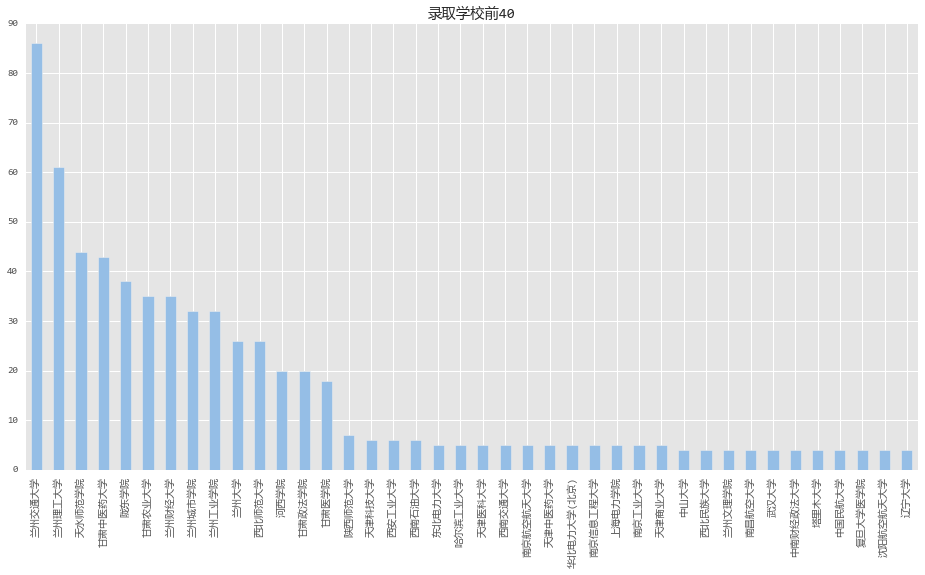

In [6]:
school = data.school.value_counts()
school[0:40].plot.bar(figsize=(16,8), color='#95bee6', title=u'录取学校前40')
plt.show()

In [7]:
len(data)

1074

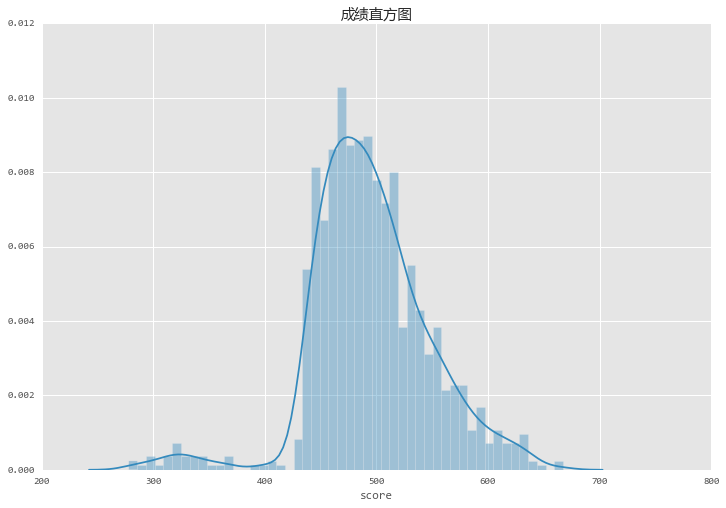

In [8]:
plt.figure(figsize=(12,8))
plt.title(u'成绩直方图')
sns.distplot(data.score, bins=50)
plt.show()

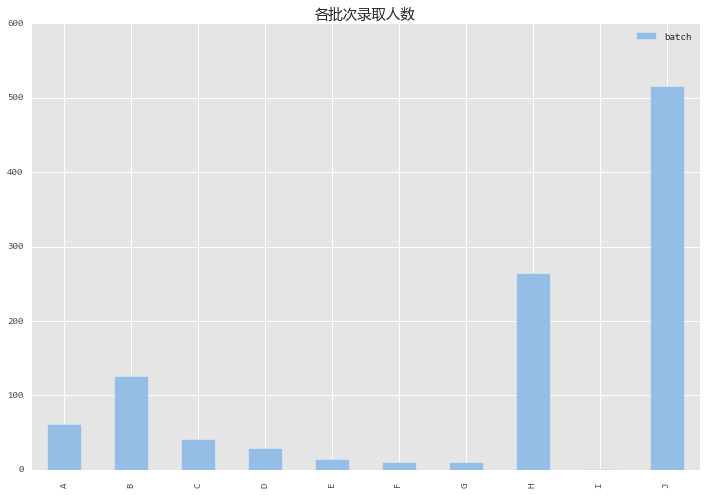

In [9]:
batch = pd.DataFrame(data.batch.value_counts())
batch.sort_index(inplace=True)
batch.plot.bar(figsize=(12,8), color='#95bee6', title=u'各批次录取人数')
plt.show()

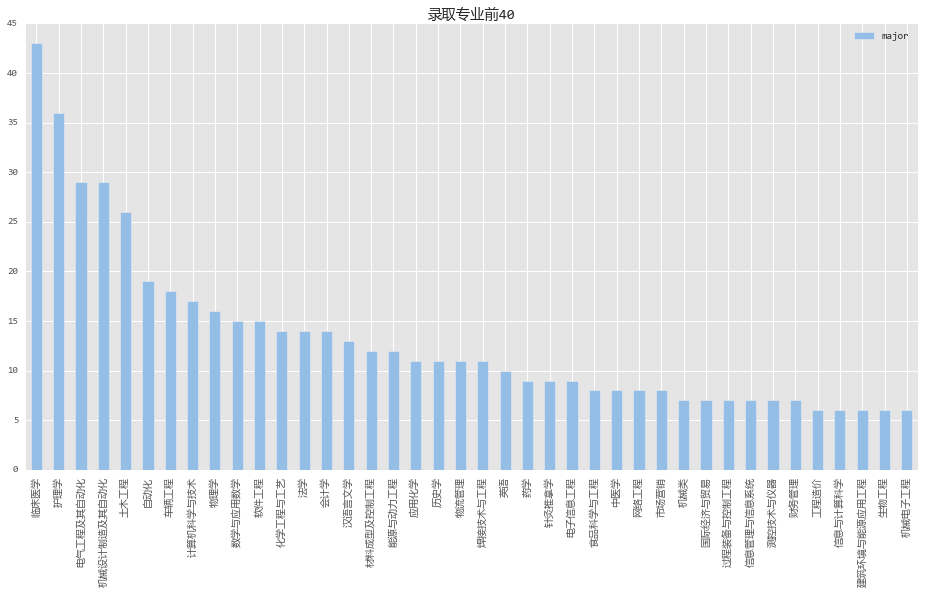

In [10]:
major = pd.DataFrame(data.major.value_counts())
major[0:40].plot.bar(figsize=(16,8), color='#95bee6', title=u'录取专业前40')
plt.show()

In [11]:
for i in range(len(data)):
    try:
        data.loc[i,'city'] = school_name[school_name.school==data.loc[i,'school'].decode('utf8')].city.values[0]
        data.loc[i,'provence'] = school_name[school_name.city==data.loc[i,'city']].provence.values[0]
    except:
        data.loc[i,'city'] = '0'
        data.loc[i,'provence'] = '0'

In [12]:
data.head()

,name,school,major,batch,score,year,city,provence
0,成炳希,清华大学,生物医学工程,G,667,2016,北京市,北京市
1,姚照原,北京大学,地球物理学类,B,660,2016,北京市,北京市
2,司锦彦,中国科学技术大学,化学类,B,644,2016,合肥市,安徽省
3,王北辰,上海交通大学医学院,临床医学（五年制）,B,643,2016,上海市,上海市
4,李家栋,浙江大学,工科试验班（航空航天与过程装备）,B,639,2016,杭州市,浙江省


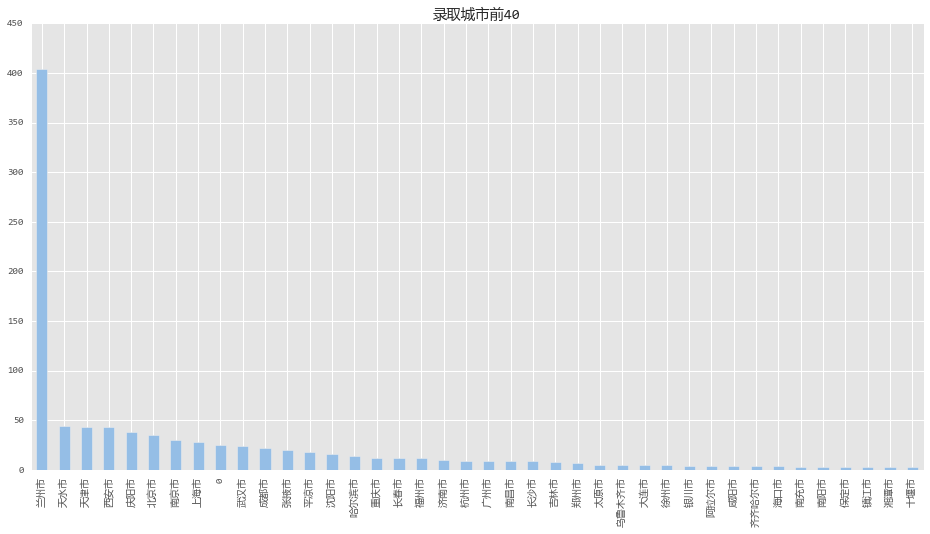

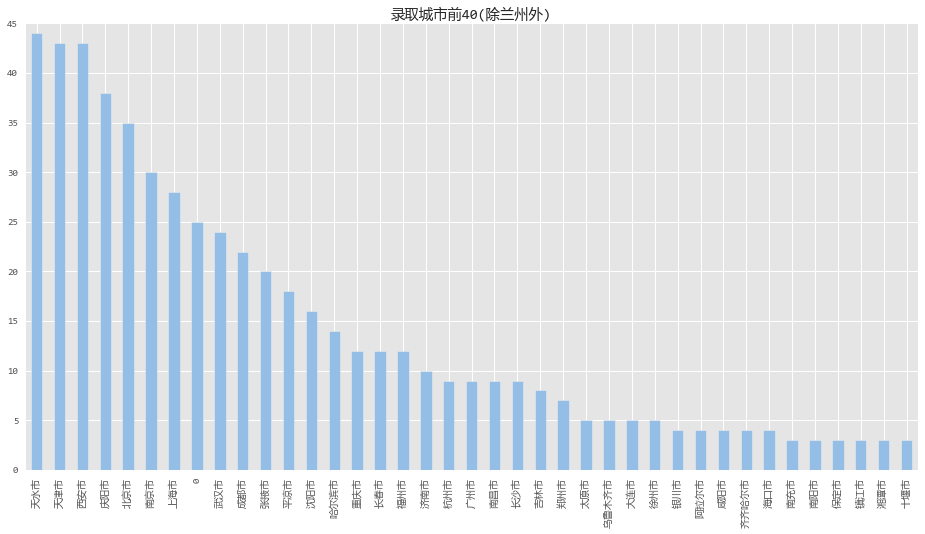

In [13]:
city = data.city.value_counts()
city[0:40].plot.bar(figsize=(16,8), color='#95bee6', title=u'录取城市前40')
plt.show()
city[1:40].plot.bar(figsize=(16,8), color='#95bee6', title=u'录取城市前40(除兰州外)')
plt.show()

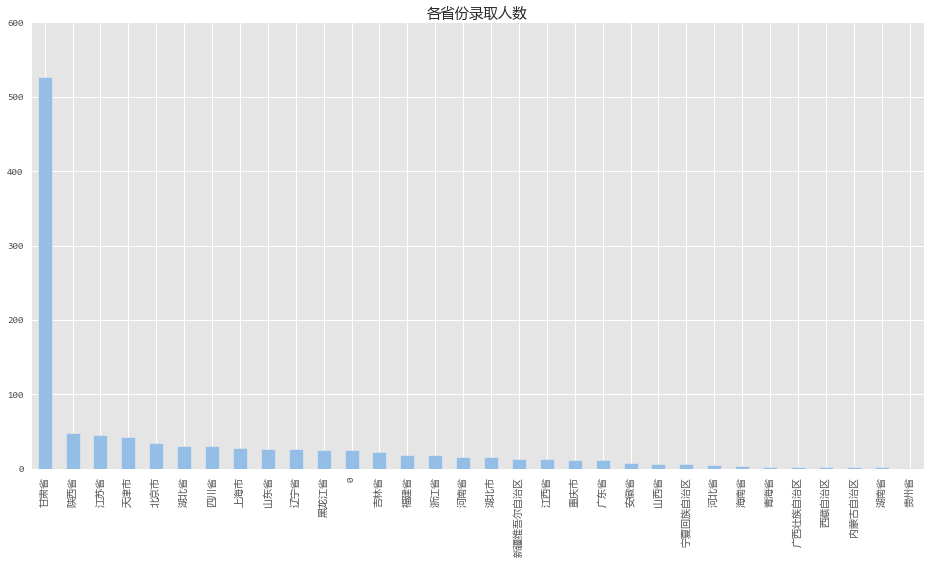

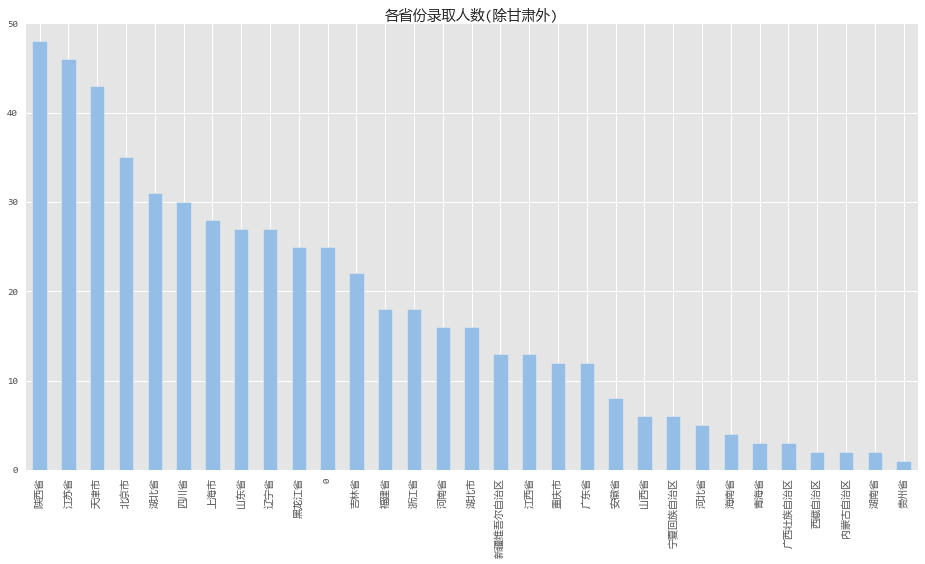

In [14]:
provence = data.provence.value_counts()
provence.plot.bar(figsize=(16,8), color='#95bee6', title=u'各省份录取人数')
plt.show()
provence[1:].plot.bar(figsize=(16,8), color='#95bee6', title=u'各省份录取人数(除甘肃外)')
plt.show()

In [15]:
top_score = 600
top = data[data.score>=top_score]

In [16]:
top_num = 50
top = data[:top_num]

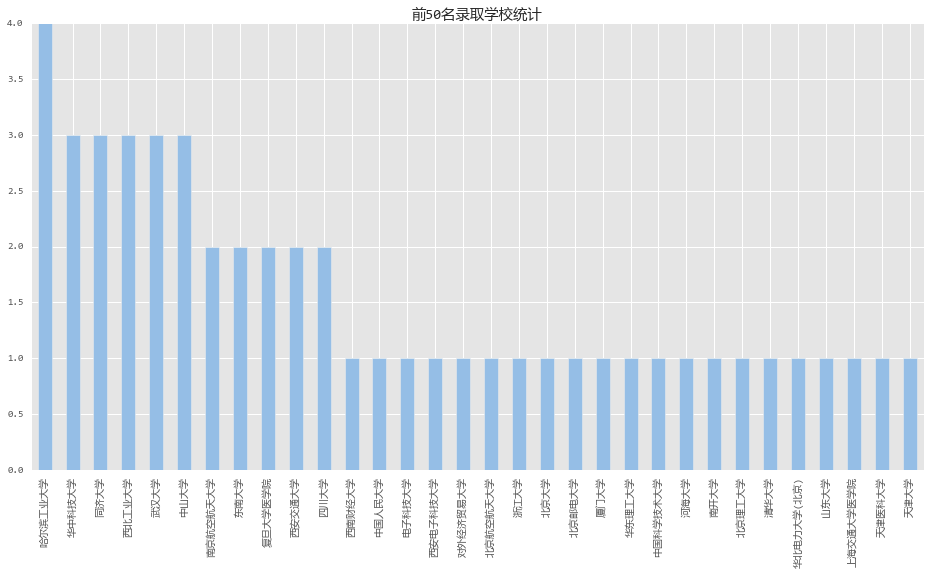

In [17]:
top_school = top.school.value_counts()
top_school.plot.bar(figsize=(16,8), color='#95bee6', title=u'前50名录取学校统计')
plt.show()